# Mettre en place notre environnement
________

La première chose que nous devons faire est de charger les bibliothèques et les ensembles de données que nous allons utiliser. Pour aujourd'hui, nous allons travailler avec deux ensembles de données : un contenant des chroniques de température dans le lit de la rivière (zone hyporhéique), et un autre contenant des les chroniques de différence de charge enregistré en **Volt**.

**Important!** Assurez-vous d'exécuter cette cellule vous-même ou le reste de votre code ne fonctionnera pas

In [1]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# read in our data
capteur_riviere = pd.read_csv("../sampling_points/Point034/point034_P_measures.csv")
capteur_ZH = pd.read_csv("../sampling_points/Point034/point034_T_measures.csv")
etalonage_capteur_riv = pd.read_csv("../configuration/pressure_sensors/P508.csv")

# set seed for reproducibility
np.random.seed(0)

Nous sommes maintenant prêts à examiner quelques dates ! (Si vous le souhaitez, vous pouvez profiter de cette occasion pour jeter un coup d'œil à certaines des données).

# Imprimez le noms des colonnes
renommer les colonnes du fichier capteur_riviere :  	dates,tension_V,temperature_stream_C et celles du fichier capteur_ZH  :
#,dates,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C



# Transformez les données de différence de charge en mètres



In [2]:
capteur_riviere.rename(columns = {'Unnamed: 1' : 'dates', 'Unnamed: 2' : 'tension_V', 'Unnamed: 3' : 'temperature_stream_C'}, inplace = True)
capteur_ZH.columns = ['#','dates', 'temperature_depth_1_C',  'temperature_depth_2_C',  'temperature4depth_3_C', 'temperature_depth_4_C', 'Unnamed 1', 'Piche', 'Pouche']
print(capteur_riviere.dtypes)
capteur_riviere['tension_V']=pd.to_numeric(capteur_riviere['tension_V'], errors  ='coerce')
capteur_riviere['temperature_stream_C']=pd.to_numeric(capteur_riviere['temperature_stream_C'], errors  ='coerce')
#capteur_riviere['tension_V'] = capteur_riviere['tension_V'].astype(float)
print(capteur_riviere.dtypes)
capteur_riviere.head()

Titre de tracé : point_montberneux    object
dates                                 object
tension_V                             object
temperature_stream_C                  object
Unnamed: 4                            object
Unnamed: 5                            object
Unnamed: 6                            object
dtype: object
Titre de tracé : point_montberneux     object
dates                                  object
tension_V                             float64
temperature_stream_C                  float64
Unnamed: 4                             object
Unnamed: 5                             object
Unnamed: 6                             object
dtype: object


,Titre de tracé : point_montberneux,dates,tension_V,temperature_stream_C,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,#,"Date Heure, GMT+01:00",NaN,NaN,Hôte connecté (LGR S/N: 10831978),Arrêté (LGR S/N: 10831978),Fin de fichier (LGR S/N: 10831978)
1,1,06/27/16 12:00:00 PM,1.26787,18.342,NaN,NaN,NaN
2,2,06/27/16 12:15:00 PM,1.06630,13.898,NaN,NaN,NaN
3,3,06/27/16 12:30:00 PM,1.20661,13.915,NaN,NaN,NaN
4,4,06/27/16 12:45:00 PM,1.24533,13.939,NaN,NaN,NaN


In [3]:
capteur_riviere['charge_M'] = ((capteur_riviere['tension_V'])-(capteur_riviere['temperature_stream_C'])*0.001474-1.210344)/(-1.462495)

In [4]:

capteur_riviere.head()

,Titre de tracé : point_montberneux,dates,tension_V,temperature_stream_C,Unnamed: 4,Unnamed: 5,Unnamed: 6,charge_M
0,#,"Date Heure, GMT+01:00",NaN,NaN,Hôte connecté (LGR S/N: 10831978),Arrêté (LGR S/N: 10831978),Fin de fichier (LGR S/N: 10831978),NaN
1,1,06/27/16 12:00:00 PM,1.26787,18.342,NaN,NaN,NaN,-0.020848
2,2,06/27/16 12:15:00 PM,1.06630,13.898,NaN,NaN,NaN,0.112499
3,3,06/27/16 12:30:00 PM,1.20661,13.915,NaN,NaN,NaN,0.016578
4,4,06/27/16 12:45:00 PM,1.24533,13.939,NaN,NaN,NaN,-0.009873


# Traitement des dates
## Vérifiez le type de données de notre colonne de date
___

Imprimer les dates des deux fichiers

In [5]:
capteur_riviere.head()

,Titre de tracé : point_montberneux,dates,tension_V,temperature_stream_C,Unnamed: 4,Unnamed: 5,Unnamed: 6,charge_M
0,#,"Date Heure, GMT+01:00",NaN,NaN,Hôte connecté (LGR S/N: 10831978),Arrêté (LGR S/N: 10831978),Fin de fichier (LGR S/N: 10831978),NaN
1,1,06/27/16 12:00:00 PM,1.26787,18.342,NaN,NaN,NaN,-0.020848
2,2,06/27/16 12:15:00 PM,1.06630,13.898,NaN,NaN,NaN,0.112499
3,3,06/27/16 12:30:00 PM,1.20661,13.915,NaN,NaN,NaN,0.016578
4,4,06/27/16 12:45:00 PM,1.24533,13.939,NaN,NaN,NaN,-0.009873


Remarquez qu'en bas de la sortie de `head()`, vous pouvez voir qu'il est dit que le type de données de cette colonne est "object". 

> Pandas utilise le dtype "object" pour stocker différents types de données, mais le plus souvent, lorsque vous voyez une colonne avec le dtype "object", elle contient des chaînes de caractères. 

Si vous consultez la documentation sur le dtype de Pandas [ici] (http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes), vous remarquerez qu'il existe également un dtype spécifique `datetime64`. Comme le dtype de notre colonne est `object` plutôt que `datetime64`, nous pouvons dire que Python ne sait pas que cette colonne contient des dates.

Nous pouvons aussi regarder uniquement le dtype de votre colonne sans imprimer les premières lignes si nous le souhaitons :

In [6]:
# check the data type of our date column
capteur_riviere.dtypes

Titre de tracé : point_montberneux     object
dates                                  object
tension_V                             float64
temperature_stream_C                  float64
Unnamed: 4                             object
Unnamed: 5                             object
Unnamed: 6                             object
charge_M                              float64
dtype: object

In [7]:
capteur_riviere.dtypes['dates']

dtype('O')

You may have to check the [numpy documentation](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.dtype.kind.html#numpy.dtype.kind) to match the letter code to the dtype of the object. "O" is the code for "object", so we can see that these two methods give us the same information.

## Convertir nos colonnes de date en datetime
___

Maintenant que nous savons que notre colonne de date n'est pas reconnue comme une date, il est temps de la convertir pour qu'elle soit reconnue comme une date. Cette opération est appelée "analyse syntaxique des dates" car nous prenons une chaîne de caractères et identifions ses composants. Nous allons utiliser la fonction pd.to_datetime.

Nous pouvons indiquer à pandas le format de nos dates à l'aide d'un guide appelé ["strftime directive", sur lequel vous trouverez plus d'informations à ce lien] (http://strftime.org/). L'idée de base est que vous devez indiquer quelles parties de la date se trouvent où et quelle ponctuation se trouve entre elles. Il existe [de nombreuses parties possibles d'une date](http://strftime.org/), mais les plus courantes sont `%d` pour le jour, `%m` pour le mois, `%y` pour une année à deux chiffres et `%Y` pour une année à quatre chiffres.

Quelques exemples :

 * Le 17 janvier 2007 a le format "%m/%d/%y".
 * 17-1-2007 a le format "%d-%m-%Y".
 

In [8]:
capteur_riviere['dates'] = pd.to_datetime(capteur_riviere['dates'] , infer_datetime_format = True, errors = 'coerce')

Maintenant que nos dates sont analysées correctement, nous pouvons travailler avec celles-ci.

___
* Bien que nous spécifions le format de la date ici, il arrive parfois que vous rencontriez une erreur lorsque plusieurs formats de date sont présents dans une même colonne. Dans ce cas, vous pouvez demander à pandas de déduire le bon format de date. Vous pouvez le faire comme suit :

`capteur_riviere['date'] = pd.to_datetime(capteur_riviere['date'], infer_datetime_format=True)``

**Pourquoi ne pas toujours utiliser `infer_datetime_format = True?`** Il y a deux grandes raisons de ne pas toujours faire deviner à pandas le format de l'heure. La première est que pandas n'est toujours capable de trouver le bon format de date, surtout si quelqu'un a fait preuve de créativité dans la saisie des données. La seconde est que c'est beaucoup plus lent que de spécifier le format exact des dates.
____

In [9]:
capteur_riviere.dtypes

Titre de tracé : point_montberneux            object
dates                                 datetime64[ns]
tension_V                                    float64
temperature_stream_C                         float64
Unnamed: 4                                    object
Unnamed: 5                                    object
Unnamed: 6                                    object
charge_M                                     float64
dtype: object

In [10]:
capteur_ZH['dates'] = pd.to_datetime(capteur_ZH['dates'] , infer_datetime_format = True, errors = 'coerce')
capteur_ZH.dtypes

#                                 int64
dates                    datetime64[ns]
temperature_depth_1_C           float64
temperature_depth_2_C           float64
temperature4depth_3_C           float64
temperature_depth_4_C           float64
Unnamed 1                        object
Piche                            object
Pouche                           object
dtype: object

## Tracer le jour du mois pour vérifier l'analyse de la date
___

L'un des plus grands dangers de l'analyse des dates est de mélanger les mois et les jours. La fonction to_datetime() a des messages d'erreur très utiles, mais il n'est pas inutile de vérifier que les jours du mois que nous avons extraits ont un sens. 

Pour ce faire, nous allons tracer un histogramme des jours du mois. Nous nous attendons à ce qu'il ait des valeurs entre 1 et 31 et, puisqu'il n'y a aucune raison de supposer que les glissements de terrain sont plus fréquents certains jours du mois que d'autres, une distribution relativement égale. (Avec un creux sur 31 car tous les mois n'ont pas 31 jours.) 

<AxesSubplot:>

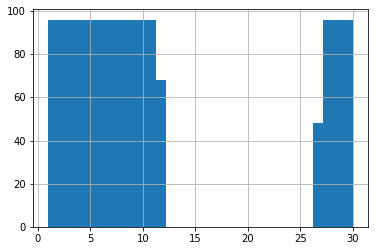

In [11]:
capteur_riviere['dates'].apply(lambda x: x.day).hist(bins = 31)

<AxesSubplot:>

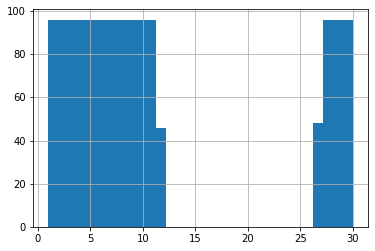

In [12]:
capteur_ZH['dates'].apply(lambda x: x.day).hist(bins = 31)

# Valeurs aberrantes

L'un des plus grands défis du nettoyage des données est l'identification et le traitement des valeurs aberrantes. En termes simples, les valeurs aberrantes sont des observations qui sont significativement différentes des autres points de données. Même les meilleurs algorithmes d'estimation des paramètres automatique seront moins performants si les observations aberrantes ne sont pas nettoyées des données, car elles impliquent des simulations obsolètes des variables.



In [13]:
print(capteur_riviere.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Titre de tracé : point_montberneux  1461 non-null   object        
 1   dates                               1460 non-null   datetime64[ns]
 2   tension_V                           1460 non-null   float64       
 3   temperature_stream_C                1460 non-null   float64       
 4   Unnamed: 4                          1 non-null      object        
 5   Unnamed: 5                          1 non-null      object        
 6   Unnamed: 6                          1 non-null      object        
 7   charge_M                            1460 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 91.4+ KB
None


In [14]:
print(capteur_ZH.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   #                      1438 non-null   int64         
 1   dates                  1438 non-null   datetime64[ns]
 2   temperature_depth_1_C  1436 non-null   float64       
 3   temperature_depth_2_C  1436 non-null   float64       
 4   temperature4depth_3_C  1436 non-null   float64       
 5   temperature_depth_4_C  1436 non-null   float64       
 6   Unnamed 1              1 non-null      object        
 7   Piche                  1 non-null      object        
 8   Pouche                 1 non-null      object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 101.2+ KB
None


## Identification des valeurs aberrantes

La présence de valeurs aberrantes dans les données peut avoir de nombreuses raisons. Parfois, les valeurs aberrantes peuvent être authentiques, alors que dans d'autres cas, elles peuvent être dues à des erreurs de saisie de données. Il est important de comprendre les raisons des valeurs aberrantes avant de les nettoyer.

Nous allons commencer le processus de recherche des valeurs aberrantes en exécutant les statistiques sommaires sur les variables. Pour ce faire, nous utilisons la fonction describe() ci-dessous, qui fournit un résumé statistique de toutes les variables quantitatives.




In [15]:
capteur_ZH.describe()

,#,temperature_depth_1_C,temperature_depth_2_C,temperature4depth_3_C,temperature_depth_4_C
count,1438.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,719.500000,14.717557,14.502795,14.348946,14.097808
std,415.259156,0.721799,0.531472,0.423288,0.328507
min,1.000000,13.329000,13.642000,13.762000,13.690000
25%,360.250000,14.146000,14.098000,14.050000,13.882000
50%,719.500000,14.625000,14.409000,14.242000,14.002000
75%,1078.750000,15.127000,14.768000,14.505000,14.194000
max,1438.000000,17.320000,17.296000,17.034000,17.130000


In [16]:
capteur_riviere.describe()

,tension_V,temperature_stream_C,charge_M
count,1460.000000,1460.000000,1460.000000
mean,1.256888,14.896441,-0.016812
std,0.047302,1.142397,0.032176
min,0.652670,9.066000,-0.140099
25%,1.246590,14.203750,-0.025327
50%,1.262150,14.818000,-0.020557
75%,1.270010,15.555000,-0.009784
max,1.432100,18.342000,0.390494


## Tracez les graphiques de distribution pour les différentes variables

array([[<AxesSubplot:title={'center':'dates'}>,
        <AxesSubplot:title={'center':'tension_V'}>],
       [<AxesSubplot:title={'center':'temperature_stream_C'}>,
        <AxesSubplot:title={'center':'charge_M'}>]], dtype=object)

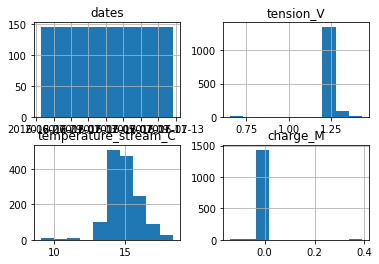

In [17]:
capteur_riviere.hist()

## Trouver les valeurs limites

In [18]:
#indexes = capteur_riviere.loc[capteur_riviere['charge_M']== capteur_riviere['charge_M'].max].index
#idmax = capteur_riviere['charge_M'].idxmax()
#idmin = capteur_riviere['charge_M'].idxmin()
#capteur_riviere.drop(labels = [idmax+1, idmin+1], inplace = True)
#capteur_riviere['charge_M'].hist()

In [19]:
capteur_riviere.drop(capteur_riviere.loc[capteur_riviere['charge_M'] > 0.2].index, inplace = True)

<AxesSubplot:>

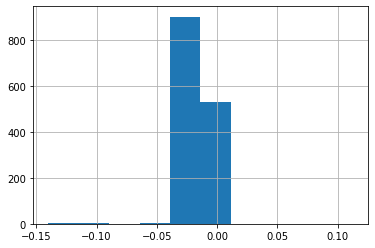

In [20]:
capteur_riviere['charge_M'].hist()